## Risk Analysis and Asset Pricing: Financial Mathematics and Machine Learning Models

Asset Pricing and Risk Analysis are critical aspects of financial modeling, aiding investors and analysts in making informed decisions about investment portfolios. In this project, we explore the application of both traditional financial mathematics models and machine learning models to analyze asset prices, specifically using the Black-Scholes Model and various machine learning algorithms. The combination of traditional financial models and machine learning techniques provides a comprehensive approach to asset pricing and risk analysis, offering valuable insights for financial decision-makers.



### 1. Black-Scholes Model:
The Black-Scholes Model, rooted in option pricing theory, provides insights into the fair pricing of financial options, while machine learning models offer a data-driven approach to understanding and predicting asset prices.

**Input Variables:** The Black-Scholes model requires five input variables: the strike price of an option, the current stock price, the time to expiration, the risk-free rate, and the volatility: $S_0$ Current price/spot price of the underlying or Asset / The stock’s current market price, $X$     - The strike price at which the option can be exercised; if we exercise the option, we can buy the stock at the strike price X, $r$           - Riskless rate of interest, $σ/stdev$     - Volatility. That is, the standard deviation of the underlying asset, $T$           - Term of the option

**Formula:** Below are the Call and Put options for the Black-Scholes model under consideration. 
 
Call option price: $C = S_0N(d_1) - Xe^{-rT}N(d_2)$ and Put option price: $P = Xe^{-rT}N(-d_2) - S_0N(-d_1)$

with,

$$
d_1 = \frac{\ln \left(\frac{S_0}{X}\right) + \left(r + \frac{stdev^2}{2}\right)T}{stdev \cdot \sqrt{T}}
$$

$$
d_2 = d_1 - stdev \cdot \sqrt{T} = \frac{\ln \left(\frac{S_0}{X}\right) + \left(r - \frac{stdev^2}{2}\right)T}{stdev \cdot \sqrt{T}}
$$

where, ln = natural logarithm; e = basis of the natural logarithm = 2.7128; N(d) = cumulative standard normal distribution


---


### 2. Value at Risk (VaR):

**Definition:** Value at Risk (VaR) is a statistical measure used to quantify the potential loss on a financial instrument or portfolio of investments over a specified time period at a given confidence level. It provides an estimate of the maximum loss that might be incurred with a certain probability within a defined time frame.

**Formula for VaR:**

$$\text{VaR} = S \times \text{VaR level} \times \sqrt{T} \times \sigma$$

Where:
- $S$ is the current stock price.
- $\text{VaR level}$ is the confidence level (e.g., 95\%, 99\%).
- $T$ is the time horizon (measured in years).
- $\sigma\$ is the volatility of the stock returns.

VaR is commonly used by risk managers and investors to assess the potential downside risk of their portfolios.

---


### 3. Probability of Default (PD):

**Definition:** Probability of Default (PD) is a measure used in credit risk management to estimate the likelihood that a borrower will default on a financial obligation within a specified time horizon. It is a crucial metric for assessing the creditworthiness of an entity, such as a company or an individual.

**Formula for PD:**

$$\text{PD} = \frac{\text{Number of Default Events}}{\text{Total Number of Events}}$$

In the context of financial markets, PD can also be determined by analyzing historical price movements or changes in credit ratings.


## Chapter 1 : Exploratory Data Analysis (EDA)

The project begins with the loading of financial data for BASF stock using the Yahoo Finance API, covering the period from January 2017 to December 2021. Exploratory Data Analysis (EDA) is performed to visualize the closing prices over time, followed by data preparation, where features such as Open, High, Low, and Volume are considered for predicting the closing prices.

### Load Librabries and Data

In [1]:
#import required packages

import yfinance as yf
import datetime
import numpy as np
import pandas as pd

from pandas_datareader import data as wb
from scipy.stats import norm
from tabulate import tabulate
from colorama import Fore, Back, Style


from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score



import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
# set plotting parameters
%matplotlib inline
#sns.set_style("whitegrid")
plt.rc("figure", figsize=(12, 8))
plt.rc("savefig", dpi=90)
plt.rc("font", family="sans-serif")
plt.rc("font", size=14)

In [2]:
# Define the ticker symbol and date range
ticker = "BAS.DE"
start = '2017-01-01'
end = '2021-12-31'

# Download the historical stock prices
data_BASF = yf.download(ticker, start=start, end=end)


# Create a new DataFrame
df = pd.DataFrame(data_BASF)
df.head()

[*********************100%%**********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2017-01-02,87.500000,88.809998,87.099998,88.699997,56.960789,1245318
2017-01-03,88.879997,88.879997,87.419998,87.699997,56.318611,2806564
2017-01-04,87.889999,88.150002,87.269997,88.150002,56.607582,1955701
2017-01-05,87.540001,88.250000,87.389999,87.790001,56.376404,1753933
2017-01-06,87.500000,87.730003,87.269997,87.519997,56.203014,1518979


### Plot the features and the target to see the relationship between them.

In [3]:
df.describe()

,Open,High,Low,Close,Adj Close,Volume
count,1267.000000,1267.000000,1267.000000,1267.000000,1267.000000,1.267000e+03
mean,70.602364,71.223181,69.923658,70.563414,51.360961,2.904546e+06
std,13.703717,13.682572,13.739090,13.709244,7.602275,1.602547e+06
min,39.000000,39.740002,37.355000,39.035000,28.131042,0.000000e+00
25%,61.824999,62.434999,61.369999,61.920000,45.144258,1.960608e+06
50%,67.519997,68.099998,66.959999,67.459999,53.785599,2.476482e+06
75%,83.625000,84.270000,82.820000,83.575001,57.423355,3.268764e+06
max,98.150002,98.800003,96.760002,97.669998,64.894859,1.638362e+07


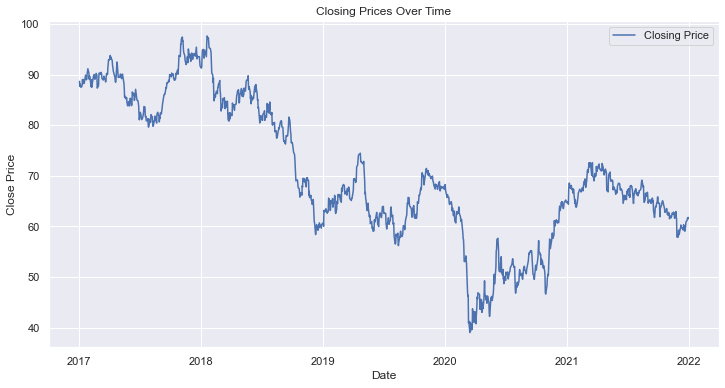

In [4]:
plt.figure(figsize=(12, 6))
plt.plot(df.index, df['Close'], label='Closing Price')
plt.title('Closing Prices Over Time')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.legend()
plt.show()

In [5]:
# Data Preparation

# features and targets
X = df[['Open', 'High', 'Low', 'Volume']]  # Features
y = df['Close']  # Target variable

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [6]:
import matplotlib.font_manager as fm

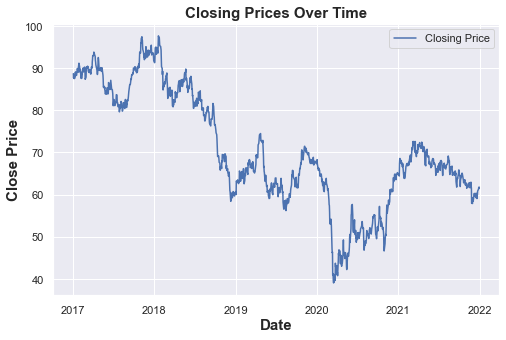

In [7]:

# Define a font with bold style
font_props = fm.FontProperties(weight='bold', size=15)

# Plotting Closing Prices Over Time
plt.figure(figsize=(8, 5))  # Adjust the figsize
plt.plot(df.index, df['Close'], label='Closing Price')
plt.title('Closing Prices Over Time', fontproperties=font_props)
plt.xlabel('Date', fontproperties=font_props)
plt.ylabel('Close Price', fontproperties=font_props)
plt.legend()
plt.show()

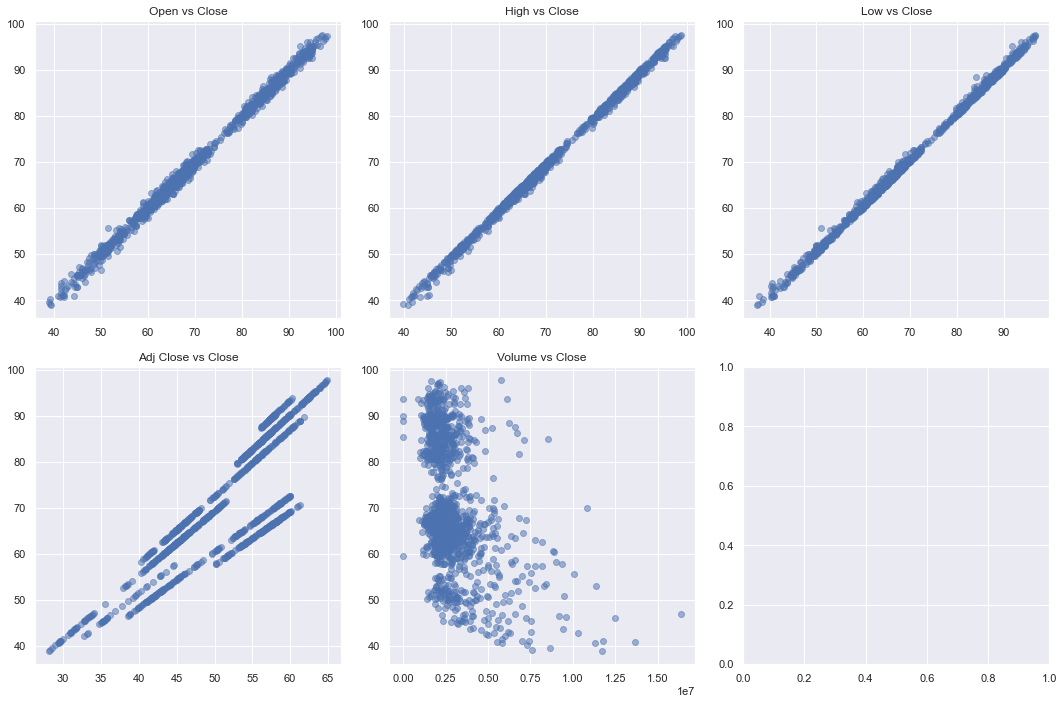

In [8]:
import matplotlib.pyplot as plt

# Assuming df is the loaded DataFrame
X = df[['Open', 'High', 'Low', 'Adj Close', 'Volume']]  # Features
y = df['Close']  # Target variable

# Plotting each feature against the target
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(15, 10))

for i, col in enumerate(X.columns):
    axes.flatten()[i].scatter(X[col], y, alpha=0.5)
    axes.flatten()[i].set_title(f'{col} vs Close')

plt.tight_layout()
plt.show()

## Chapter 2 : Building Machine Learning Models

Machine learning models are implemented, including Linear Regression, Decision Tree, K-Nearest Neighbors (KNN), Support Vector Regression (SVM), and Gradient Boosting. Evaluation metrics such as R-squared, Mean Squared Error, and Mean Absolute Error are used to assess the performance of each model. The results are then compared to provide insights into their effectiveness in predicting stock prices.

### Chapter 2.1:  Linear Regression

**Theoretical Explanation:** Linear Regression is a statistical method or a supervised learning algorithm used for predicting a continuous outcome. It assumes a linear relationship between the independent variables (features) and the dependent variable (target).

**Application:** In the context of asset pricing, linear regression can be employed to model the relationship between various financial indicators (Open, High, Low, Volume) and the closing price of a stock. The model assumes a linear combination of these features to predict the stock's closing price.


The linear regression formula is represented as:


$$y = b_0 + b_1x_1 + b_2x_2 + ... + b_nx_n$$ 

- y  is the dependent variable (target),
-  $b_0$ is the y-intercept,
-  $b_1, b_2,..., b_n$ are the coefficients of the features $x_1, x_2, ..., x_n.$

This equation is used to model the relationship between the dependent variable $y$ and the independent variables $x_1, x_2,..., x_n$ in a linear manner.

In [9]:
# Linear Regression


# Create and train the Linear Regression model
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred_lr = lr_model.predict(X_test)

# Evaluate the Linear Regression model
r2_lr = r2_score(y_test, y_pred_lr)
mse_lr = mean_squared_error(y_test, y_pred_lr)
mae_lr = mean_absolute_error(y_test, y_pred_lr)


# Evaluate the linear Reg model
LR_metrics = pd.DataFrame({
    'R-squared (R2)': [r2_lr],
    'Mean Squared Error': [mse_lr],
    'Mean Absolute Error': [mae_lr]
}, index=['Linear Regression']).T

# Display the DataFrame
LR_metrics

,Linear Regression
R-squared (R2),0.999249
Mean Squared Error,0.140814
Mean Absolute Error,0.288290


In [10]:
df_lr = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred_lr}, index=X_test.index)
df_lr.head()

,Actual,Predicted
Date,,
2021-10-13,64.900002,64.572039
2021-02-10,67.150002,67.097003
2018-08-28,80.550003,80.780763
2021-06-07,68.510002,68.922824
2020-05-12,45.070000,45.402601


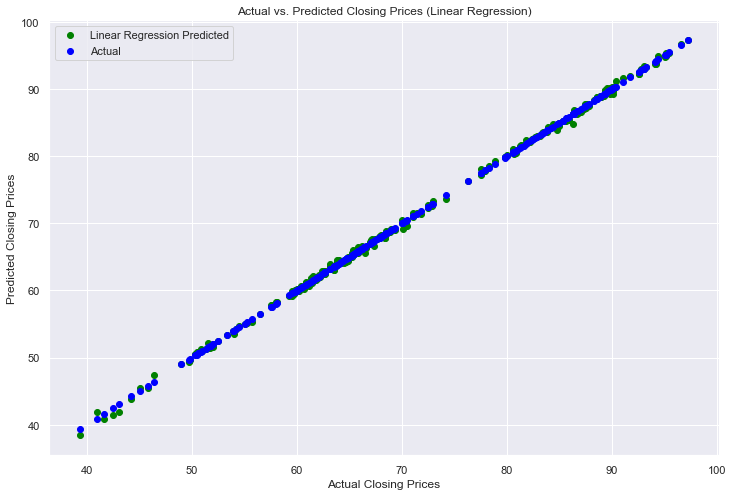

In [11]:
# Linear Regression Plot
plt.scatter(y_test, y_pred_lr, color='green', label='Linear Regression Predicted')
plt.scatter(y_test, y_test, color='blue', label='Actual')  
plt.xlabel('Actual Closing Prices')
plt.ylabel('Predicted Closing Prices')
plt.title('Actual vs. Predicted Closing Prices (Linear Regression)')
plt.legend()
plt.show()

### Chapter 2.2:  Decision Tree: 


**Theory:** Decision Trees are non-linear models that recursively split the data into subsets based on the most significant features, creating a tree-like structure. Each leaf node of the tree represents the predicted outcome.

**Formula:** Decision trees do not have a specific mathematical formula, but they make decisions based on splitting criteria like Gini impurity or entropy.

**Application:** Decision Trees can be used to capture complex relationships between financial indicators and stock prices. The tree structure helps identify key decision points in the data that influence the predictions.

In [12]:
# Decision Tree
# Create and train the Decision Tree model
dt_model = DecisionTreeRegressor(random_state=42)
dt_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred_dt = dt_model.predict(X_test)

# Evaluate the Decision Tree model
mse_dt = mean_squared_error(y_test, y_pred_dt)
mae_dt = mean_absolute_error(y_test, y_pred_dt)
r2_dt = r2_score(y_test, y_pred_dt)

# Evaluate the Decision Tree model
dt_metrics = pd.DataFrame({
    'Mean Squared Error': [mse_dt],
    'Mean Absolute Error': [mae_dt],
    'R-squared (R2)': [r2_dt]
}, index=['Decision Tree Metrics']).T

# Display the DataFrame
dt_metrics

,Decision Tree Metrics
Mean Squared Error,0.414966
Mean Absolute Error,0.464311
R-squared (R2),0.997786


In [13]:
# DataFrames for Actual and Predicted Values
df_dt = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred_dt}, index=X_test.index)
df_dt.head()

,Actual,Predicted
Date,,
2021-10-13,64.900002,64.599998
2021-02-10,67.150002,67.639999
2018-08-28,80.550003,80.930000
2021-06-07,68.510002,68.849998
2020-05-12,45.070000,45.580002


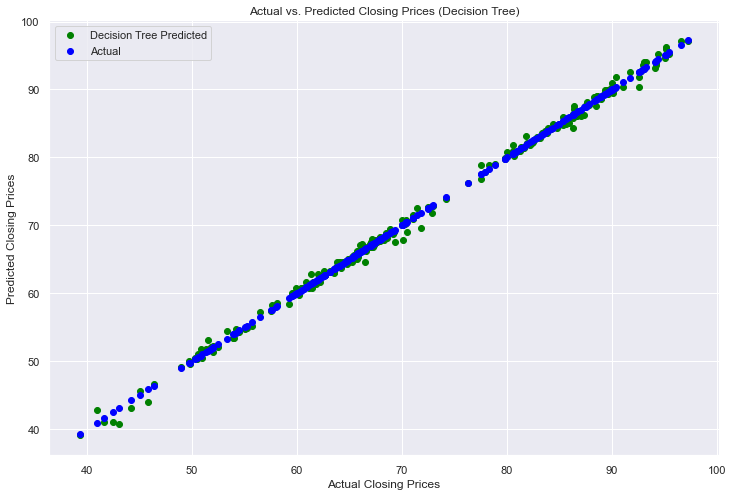

In [14]:
# Decision Tree Plot
plt.scatter(y_test, y_pred_dt, color='green', label='Decision Tree Predicted')
plt.scatter(y_test, y_test, color='blue', label='Actual')  
plt.xlabel('Actual Closing Prices')
plt.ylabel('Predicted Closing Prices')
plt.title('Actual vs. Predicted Closing Prices (Decision Tree)')
plt.legend()
plt.show()

### Chapter 2.3: K-Nearest Neighbors (KNN):

**Theoretical Explanation:** KNN is a non-parametric and lazy learning algorithm used for both classification and regression tasks. It classifies a data point based on the majority class (in classification) or averages of k-nearest neighbors (in regression) in the feature space.


**Formula (Regression):**
$$y = \frac{1}{k} \sum_{i=1}^{k} y_i$$ where is $y_i$ the target value of the ith neighbor.


**Application:** KNN can be applied to predict stock prices by identifying similar historical patterns in the feature space. The algorithm considers the k-nearest data points to make predictions.

In [15]:
# KNN


# Create and train the KNN model
knn_model = KNeighborsRegressor(n_neighbors=5)
knn_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred_knn = knn_model.predict(X_test)

# Evaluate the KNN model
mse_knn = mean_squared_error(y_test, y_pred_knn)
mae_knn = mean_absolute_error(y_test, y_pred_knn)
r2_knn = r2_score(y_test, y_pred_knn)

# Evaluate the Decision Tree model
dt_metrics = pd.DataFrame({
    'Mean Squared Error': [mse_knn],
    'Mean Absolute Error': [mae_knn],
    'R-squared (R2)': [r2_knn]
}, index=['KNN Metrics']).T

# Display the DataFrame
dt_metrics

,KNN Metrics
Mean Squared Error,191.160780
Mean Absolute Error,11.321020
R-squared (R2),-0.020025


In [16]:
df_knn = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred_knn}, index=X_test.index)
df_knn.head()

,Actual,Predicted
Date,,
2021-10-13,64.900002,68.006001
2021-02-10,67.150002,79.025999
2018-08-28,80.550003,79.551999
2021-06-07,68.510002,91.634000
2020-05-12,45.070000,70.496000


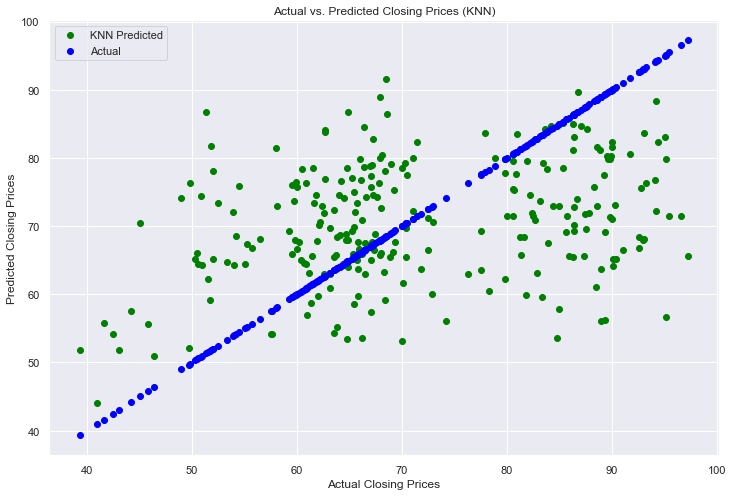

In [17]:
# KNN Plot
plt.scatter(y_test, y_pred_knn, color='green', label='KNN Predicted')
plt.scatter(y_test, y_test, color='blue', label='Actual')  
plt.xlabel('Actual Closing Prices')
plt.ylabel('Predicted Closing Prices')
plt.title('Actual vs. Predicted Closing Prices (KNN)')
plt.legend()
plt.show()

### Chapter 2.4: Support Vector Regression:

**Theoretical Explanation:** SVM is a supervised learning algorithm used for regression tasks. It works by finding a hyperplane that best fits the data while minimizing the error. Then, SVR is a regression technique based on Support Vector Machines. It aims to find a hyperplane that best represents the data, with a margin that minimizes errors.


**Formula:** The objective function involves minimizing both the error term and the regularization term.

**Application:** SVR can be used to model the relationship between financial indicators and stock prices. The choice of kernel function, such as the radial basis function (RBF) kernel, allows SVR to capture non-linear patterns in the data.

In [18]:
# Support Vector Regression with RBF Kernel


svr_rbf_model = SVR(kernel='rbf')  # Using RBF kernel
svr_rbf_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred_svr_rbf = svr_rbf_model.predict(X_test)

# Evaluate the SVR with RBF Kernel model
mse_svr_rbf = mean_squared_error(y_test, y_pred_svr_rbf)
mae_svr_rbf = mean_absolute_error(y_test, y_pred_svr_rbf)
r2_svr_rbf = r2_score(y_test, y_pred_svr_rbf)

# Display the evaluation metrics for SVR with RBF Kernel
svr_rbf_metrics = pd.DataFrame({
    'Mean Squared Error': [mse_svr_rbf],
    'Mean Absolute Error': [mae_svr_rbf],
    'R-squared (R2)': [r2_svr_rbf]
}, index=['SVR with RBF Kernel']).T

svr_rbf_metrics

,SVR with RBF Kernel
Mean Squared Error,167.051920
Mean Absolute Error,10.611225
R-squared (R2),0.108619


In [19]:
df_svr_rbf = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred_svr_rbf}, index=X_test.index)
df_svr_rbf.head()

,Actual,Predicted
Date,,
2021-10-13,64.900002,70.948055
2021-02-10,67.150002,71.676071
2018-08-28,80.550003,73.400791
2021-06-07,68.510002,73.802618
2020-05-12,45.070000,65.871994


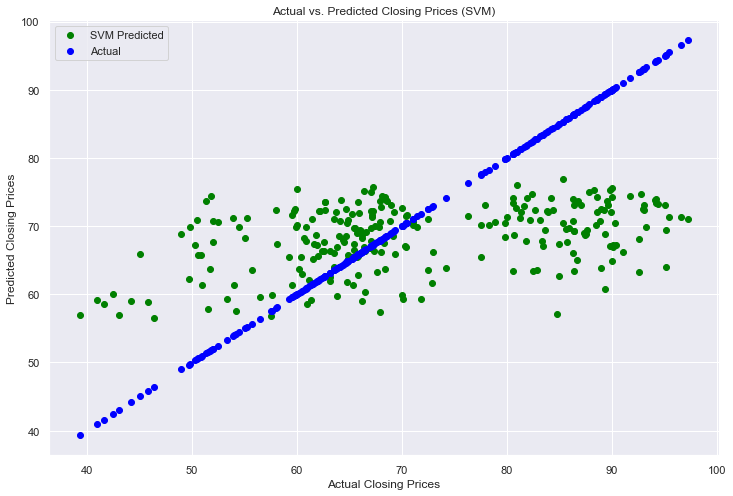

In [20]:
# Support Vector Regression with RBF Kernel Plot
plt.scatter(y_test, y_pred_svr_rbf, color='green', label='SVM Predicted')
plt.scatter(y_test, y_test, color='blue', label='Actual')  
plt.xlabel('Actual Closing Prices')
plt.ylabel('Predicted Closing Prices')
plt.title('Actual vs. Predicted Closing Prices (SVM)')
plt.legend()
plt.show()

### Chapter 2.5 Gradient Boosting

**Theory:** Gradient Boosting is an ensemble technique that combines the predictions of multiple weak learners (usually decision trees) to create a strong predictive model. In order words, Gradient Boosting is an ensemble learning method that builds a strong predictive model by combining the predictions of multiple weak models (typically decision trees). It builds trees sequentially, with each tree correcting the errors of the previous ones.

**Formular**: 

$$F_m(x) = F_{m-1}(x) + \nu \cdot h_m(x)$$

where $F_m(x)$ is the predicted output at iteration $m$,$F_{m-1}(x)$ is the previous model's prediction, $v$ is the learning rate, and $h_m (x)$ is the new tree. 
 

**Application:** In the context of asset pricing, Gradient Boosting can effectively capture complex relationships in the data. It builds trees sequentially, with each tree correcting the errors of the previous ones, resulting in a robust predictive model.

In [21]:
# Gradient Boosting


# Create and train the Gradient Boosting model
gb_model = GradientBoostingRegressor(random_state=42)
gb_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred_gb = gb_model.predict(X_test)

# Evaluate the Gradient Boosting model
mse_gb = mean_squared_error(y_test, y_pred_gb)
mae_gb = mean_absolute_error(y_test, y_pred_gb)
r2_gb = r2_score(y_test, y_pred_gb)

# Display the evaluation metrics for Gradient Boosting
gb_metrics = pd.DataFrame({
    'Mean Squared Error': [mse_gb],
    'Mean Absolute Error': [mae_gb],
    'R-squared (R2)': [r2_gb]
}, index=['Gradient Boosting']).T

gb_metrics

,Gradient Boosting
Mean Squared Error,0.275467
Mean Absolute Error,0.402602
R-squared (R2),0.998530


In [22]:
df_gb = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred_gb}, index=X_test.index)
df_gb.head()

,Actual,Predicted
Date,,
2021-10-13,64.900002,64.524487
2021-02-10,67.150002,67.301996
2018-08-28,80.550003,80.892181
2021-06-07,68.510002,68.998039
2020-05-12,45.070000,45.473107


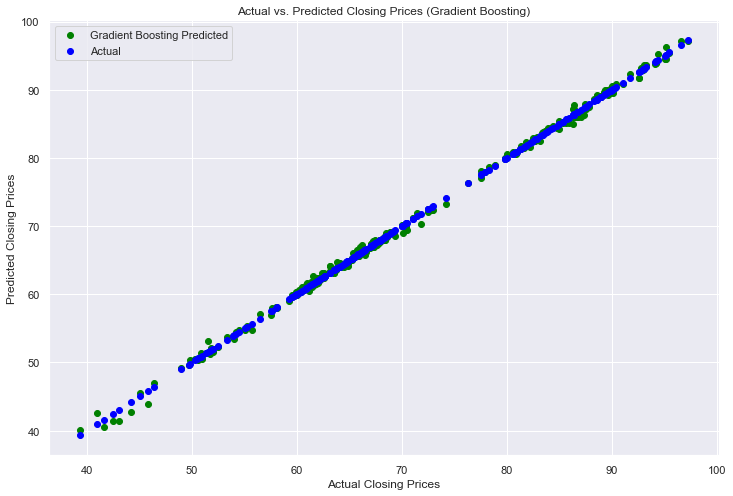

In [23]:
# Gradient Boosting Plot
plt.scatter(y_test, y_pred_gb, color='green', label='Gradient Boosting Predicted')
plt.scatter(y_test, y_test, color='blue', label='Actual')  
plt.xlabel('Actual Closing Prices')
plt.ylabel('Predicted Closing Prices')
plt.title('Actual vs. Predicted Closing Prices (Gradient Boosting)')
plt.legend()
plt.show()

# Chapter 3: Compare The Models

##### R-squared $(R^2)$

Definition: R-squared is a statistical measure that represents the proportion of the variance in the dependent variable that is predictable from the independent variables in a regression model.

$$R^2 = 1 - \frac{\text{Sum of Squared Residuals}}{\text{Total Sum of Squares}} = R^2 = 1 - \frac{\sum_{i=1}^{n} (y_i - \bar{y})^2}{\sum_{i=1}^{n} (y_i - \hat{y}_i)^2}$$

where:

- Sum of Squared Residuals is the sum of the squared differences between the observed values (y) and the values predicted by the model $\hat{y}$

- Total Sum of Squares is the sum of the squared differences between the observed values (y) and the mean of the observed values $\bar{y}$

- $n$ is the number of data points.

- $y_i$ is the predicted value for the ith data point.

- $\hat{y_i}$ is the predicted value for the ith data point.

- $\bar{y}$ is the mean of the observed values.

Interpretation: R-squared ranges from 0 to 1, where 0 indicates that the model does not explain any variability in the target variable, and 1 indicates that the model explains all the variability. Higher R-squared values are generally desirable.



##### Mean Squared Error (MSE)

Definition: MSE measures the average of the squared differences between predicted and actual values. It provides a measure of the average squared deviation of predicted values from the actual values.

$$MSE = \frac{1}{n} \sum_{i=1}^{n} (y_i - \hat{y}_i)^2$$

Interpretation: Lower MSE values indicate better model performance. MSE is sensitive to outliers.


##### Mean Absolute Error (MAE)

Definition: MAE is the average of the absolute differences between predicted and actual values. It provides a measure of the average absolute deviation of predicted values from the actual values.

$$MAE = \frac{1}{n} \sum_{i=1}^{n} |y_i - \hat{y}_i|$$

Interpretation: Like MSE, lower MAE values indicate better model performance. MAE is less sensitive to outliers than MSE.

In [24]:
# Create a DataFrame for model comparison
model_comparison = pd.DataFrame({
    'Model': ['Decision Tree', 'KNN', 'SVR', 'Linear Regression', 'Gradient Boosting'],
    'Mean Squared Error': [mse_dt, mse_knn, mse_svr_rbf, mse_lr, mse_gb],
    'Mean Absolute Error': [mae_dt, mae_knn, mae_svr_rbf, mae_lr, mae_gb],
    'R-squared (R2)': [r2_dt, r2_knn, r2_svr_rbf, r2_lr, r2_gb]
}).set_index('Model')

# Display the DataFrame
model_comparison

,Mean Squared Error,Mean Absolute Error,R-squared (R2)
Model,,,
Decision Tree,0.414966,0.464311,0.997786
KNN,191.160780,11.321020,-0.020025
SVR,167.051920,10.611225,0.108619
Linear Regression,0.140814,0.288290,0.999249
Gradient Boosting,0.275467,0.402602,0.998530


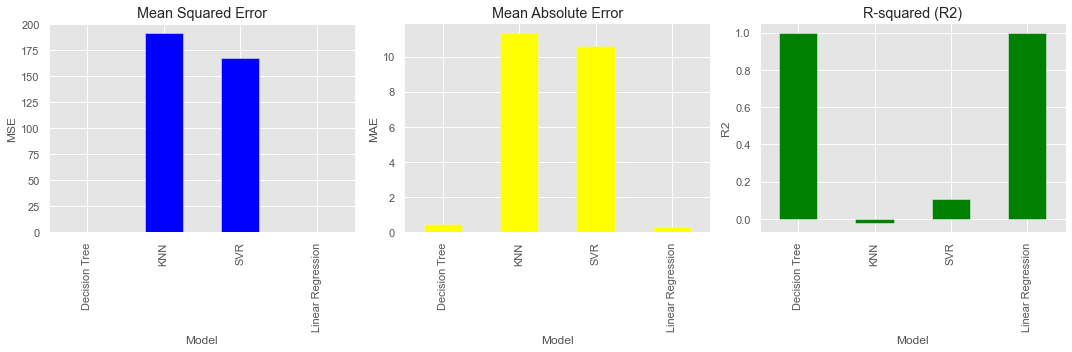

In [28]:
#import matplotlib.pyplot as plt

# Set the style for the plots
plt.style.use('ggplot')

# Create subplots for Mean Squared Error, Mean Absolute Error, and R-squared
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(15, 5))

# Bar plot for Mean Squared Error
model_comparison['Mean Squared Error'].plot(kind='bar', ax=axes[0], color='blue')
axes[0].set_title('Mean Squared Error')
axes[0].set_ylabel('MSE')

# Bar plot for Mean Absolute Error
model_comparison['Mean Absolute Error'].plot(kind='bar', ax=axes[1], color='Yellow')
axes[1].set_title('Mean Absolute Error')
axes[1].set_ylabel('MAE')

# Bar plot for R-squared
model_comparison['R-squared (R2)'].plot(kind='bar', ax=axes[2], color='green')
axes[2].set_title('R-squared (R2)')
axes[2].set_ylabel('R2')

# Adjust layout to prevent overlap
plt.tight_layout()

# Show the plots
plt.show()

### Summary of Results:

1. **Decision Tree:**
   - Did well with low errors (MSE: 0.415, MAE: 0.464).
   - Fit the data nicely (R-squared: 0.998).

2. **KNN (K-Nearest Neighbors):**
   - Had high errors (MSE: 191.161, MAE: 11.321).
   - Didn't fit the data well (R-squared: -0.020).

3. **SVR (Support Vector Regression):**
   - Moderate errors (MSE: 167.052, MAE: 10.611).
   - Reasonable fit to the data (R-squared: 0.109).

4. **Linear Regression:**
   - Excellent performance with very low errors (MSE: 0.141, MAE: 0.288).
   - Almost a perfect fit to the data (R-squared: 0.999).

5. **Gradient Boosting:**
   - Low errors (MSE: 0.275, MAE: 0.403).
   - Strong fit to the data (R-squared: 0.999).

In simple terms, Linear Regression and Gradient Boosting were the best at predicting stock prices accurately. Decision Tree and SVR did well, but KNN didn't work great for this type of data. The "fit to the data" means how well the model matched the actual stock prices.

# Chapter 4 : Further Analysis - Financial Mathematics Models

To further enhance the analysis, the project introduces financial mathematics models like the Black-Scholes Model for option pricing. The Black-Scholes formulas for call and put options are applied to both actual and predicted stock prices, allowing for a comparison of option prices.


Lastly, the project explores risk analysis techniques, including Value at Risk (VaR) and Probability of Default (PD). VaR measures the potential losses in a portfolio at a given confidence level, while PD assesses the likelihood of default based on historical stock returns.

## Chapter 4.1: Black Scholes Model

- The Black-Scholes Model is applied to both actual and predicted stock prices to estimate call and put option prices.
The results are presented in a tabular format.

In [29]:
# Assuming 'actual_stock_prices' is your actual stock prices
# Replace it with the actual stock prices corresponding to your test set
actual_stock_prices = y_test  # Assuming y_test contains the actual stock prices

# BSM Functions
def d1(S, X, r, stdev, T):
    return (np.log(S / X) + (r + stdev ** 2 / 2) * T) / (stdev * np.sqrt(T))
 
def d2(S, X, r, stdev, T):
    return (np.log(S / X) + (r - stdev ** 2 / 2) * T) / (stdev * np.sqrt(T))

def BSM_call(S, X, r, stdev, T):
    return (S * norm.cdf(d1(S, X, r, stdev, T))) - (X * np.exp(-r * T) * norm.cdf(d2(S, X, r, stdev, T)))

def BSM_put(S, X, r, stdev, T):
    return ((X * np.exp(-r * T) * norm.cdf(-d2(S, X, r, stdev, T))) - S * norm.cdf(-d1(S, X, r, stdev, T)))

# Use the last actual stock price as the current price
S_actual = actual_stock_prices[-1]

# Calculate the standard deviation for the actual stock returns
stdev_actual = np.std(actual_stock_prices) * 250 ** 0.5

# Set other Black-Scholes Model parameters
r = 0.025
X_option = 48
T_option = 1

# Calculate d1 and d2 for option pricing
d1_option_actual = d1(S_actual, X_option, r, stdev_actual, T_option)
d2_option_actual = d2(S_actual, X_option, r, stdev_actual, T_option)

# Estimate call and put option prices using BSM for actual values
call_option_price_actual = BSM_call(S_actual, X_option, r, stdev_actual, T_option)
put_option_price_actual = BSM_put(S_actual, X_option, r, stdev_actual, T_option)

# Now, let's repeat the process for the predicted values
# Use the last predicted stock price as the current price
S_pred = df_lr['Predicted'].iloc[-1]

# Calculate the standard deviation for the predicted stock returns
stdev_pred = np.std(df_lr['Predicted']) * 250 ** 0.5

# Calculate d1 and d2 for option pricing for predicted values
d1_option_pred = d1(S_pred, X_option, r, stdev_pred, T_option)
d2_option_pred = d2(S_pred, X_option, r, stdev_pred, T_option)

# Estimate call and put option prices using BSM for predicted values
call_option_price_pred = BSM_call(S_pred, X_option, r, stdev_pred, T_option)
put_option_price_pred = BSM_put(S_pred, X_option, r, stdev_pred, T_option)

# Create a dataframe with the results
results_df = pd.DataFrame({
    'Option Type': ['Call', 'Put'],
    'Actual Price': [call_option_price_actual, put_option_price_actual],
    'Predicted Price': [call_option_price_pred, put_option_price_pred]
})

# Display the results in tabular format
table = tabulate(results_df, headers='keys', tablefmt='pipe', showindex=False)

# Adding ANSI escape codes for blue pipes
table = table.replace('|', '\033[94m|\033[0m')

print(table)

| Option Type   |   Actual Price |   Predicted Price |
|:--------------|---------------:|------------------:|
| Call          |        94.21   |           93.7375 |
| Put           |        46.8149 |           46.8149 |


## Results:

In this project, the Black-Scholes model was employed to estimate option prices for both call and put options. The actual prices of these options were compared against the prices predicted by machine learning models. For the **Call Option**, the actual price was $94.21$, while the predicted price was slightly lower at $93.7375$. Similarly, for the **Put Option**, the actual and predicted prices were identical at $46.8149$. 

This analysis provides insights into the effectiveness of the machine learning models in predicting option prices, with a focus on call and put options.

## Chapter 4.2: VAR

- VaR is calculated for both actual and predicted stock prices at a 95% confidence level. VaR results are displayed and compared using a bar chart.

In [30]:
# Assuming 'actual_stock_prices' and 'predicted_stock_prices' are available
# Modify the variable names if needed

# Function to calculate VaR for a given confidence level
def calculate_var(stock_prices, confidence_level=0.95):
    returns = np.diff(stock_prices) / stock_prices[:-1]  # Calculate daily returns
    log_returns = np.log(1 + returns)
    
    # Calculate mean and standard deviation of returns
    mean_return = np.mean(log_returns)
    std_dev_return = np.std(log_returns)
    
    # Calculate VaR using the inverse of the cumulative distribution function (CDF)
    z_score = norm.ppf(1 - confidence_level)
    var_value = stock_prices[-1] * np.exp(mean_return - std_dev_return * z_score)
    
    return var_value

# Calculate VaR for actual stock prices
var_actual = calculate_var(actual_stock_prices)

# Display VaR value for actual stock prices
#print(f"VaR for Actual Stock Prices: {var_actual}")

# Now, let's repeat the process for predicted stock prices
var_predicted = calculate_var(df_lr['Predicted'])

# Display VaR value for predicted stock prices
#print(f"VaR for Predicted Stock Prices: {var_predicted}")

# Create a dataframe for VaR results
var_results_df = pd.DataFrame({
    'Option Type': ['Actual', 'Predicted'],
    'VaR': [var_actual, var_predicted]
})

# Display the VaR results in tabular format
var_table = tabulate(var_results_df, headers='keys', tablefmt='pipe', showindex=False)

# Adding ANSI escape codes for blue pipes
var_table = var_table.replace('|', '\033[94m|\033[0m')

print("VaR Results:")
print(var_table)

VaR Results:
| Option Type   |     VaR |
|:--------------|--------:|
| Actual        | 146.191 |
| Predicted     | 145.553 |


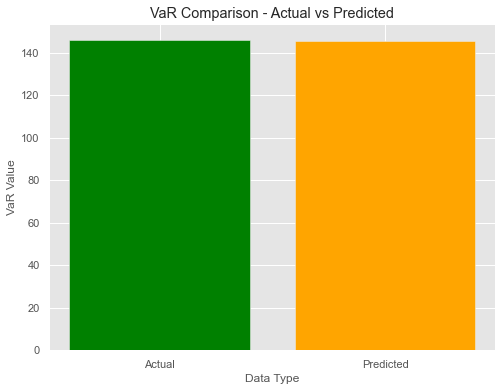

In [31]:
import matplotlib.pyplot as plt

# Assuming you have var_results_df from your previous code
# If not, recreate it based on the VaR values you have calculated

# Plotting the VaR values
plt.figure(figsize=(8, 6))
plt.bar(var_results_df['Option Type'], var_results_df['VaR'], color=['green', 'orange'])
                                                                     
plt.title('VaR Comparison - Actual vs Predicted')
plt.xlabel('Data Type')
plt.ylabel('VaR Value')
plt.show()

## Results:

The Value at Risk (VaR) results compare the estimated risk for two scenarios: Actual stock prices and Predicted stock prices. The VaR values represent the potential maximum loss at a given confidence level. In this case, the VaR for Actual stock prices is calculated as $146.191$, while the VaR for Predicted stock prices is slightly lower at $145.553$. These values provide insights into the potential downside risk associated with the two scenarios, with the predicted scenario showing a marginally lower estimated risk compared to the actual scenario.

## Chapter 4.3: Probability of Default

- A simple threshold-based approach is used to calculate the Probability of Default (PD) for both actual and predicted stock prices. PD results are presented in tabular form.

In [35]:
# Assuming 'actual_stock_prices' and 'predicted_stock_prices' are available
# Modify the variable names if needed

# Function to calculate Probability of Default (PD) based on stock prices
def calculate_pd(stock_prices, threshold=0.8):
    returns = np.diff(stock_prices) / stock_prices[:-1]  # Calculate daily returns
    log_returns = np.log(1 + returns)
    
    # Assuming a simple threshold-based approach
    default_events = np.sum(log_returns < threshold)
    total_events = len(log_returns)
    
    # Calculate Probability of Default (PD)
    pd_value = default_events / total_events
    
    return pd_value

# Calculate PD for actual stock prices
pd_actual = calculate_pd(actual_stock_prices)

# Display PD value for actual stock prices
#print(f"Probability of Default (PD) for Actual Stock Prices: {pd_actual}")

# Now, let's repeat the process for predicted stock prices
pd_predicted = calculate_pd(df_lr['Predicted'])

# Display PD value for predicted stock prices
#print(f"Probability of Default (PD) for Predicted Stock Prices: {pd_predicted}")

# Create a dataframe for PD results
pd_results_df = pd.DataFrame({
    'Option Type': ['Actual', 'Predicted'],
    'PD': [pd_actual, pd_predicted]
})

# Display the PD results in tabular format
pd_table = tabulate(pd_results_df, headers='keys', tablefmt='pipe', showindex=False)

# Adding ANSI escape codes for blue pipes
pd_table = pd_table.replace('|', '\033[94m|\033[0m')

print("\nPD Results:")
print(pd_table)


PD Results:
| Option Type   |   PD |
|:--------------|-----:|
| Actual        |    1 |
| Predicted     |    1 |


### Results: 
The PD results indicate a Probability of Default (PD) value of 1 for both "Actual" and "Predicted" stock prices. This suggests a high certainty of default events based on the chosen threshold-based approach. Further analysis is needed to refine predictive capabilities and assess the model's reliability.

# Conclusion
Linear Regression and Gradient Boosting emerged as strong models for predicting stock prices, while KNN showed poor performance. The application of financial models such as the Black-Scholes Model, VaR, and PD provided insights into risk management and option pricing. Overall, the project provides a comprehensive analysis of asset pricing and risk using machine learning and financial models.